In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [2]:
winequality_red = pd.read_csv('winequality-red.csv', sep=';')
winequality_red['red'] = 1
winequality_white = pd.read_csv('winequality-white.csv', sep=';')
winequality_white['red'] = 0

wine = pd.concat([winequality_red, winequality_white], axis=0)

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
wine = wine.values
features = wine[:, :-1]
target = wine[:, -1]

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [8]:
from sklearn.metrics import confusion_matrix

def balanced_accuracy_score_my(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    balanced_accuracy = 1/2 * (TP/(TP+FN) + TN/(TN+FP))
    
    return balanced_accuracy

In [9]:
from sklearn.metrics import balanced_accuracy_score

In [10]:
y_true =  [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]


print('Библиотечная balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('Реализованная balanced_accuracy_score_my: ', balanced_accuracy_score_my(y_true, y_pred))

Библиотечная balanced_accuracy_score:  0.6071428571428572
Реализованная balanced_accuracy_score_my:  0.6071428571428572


In [11]:
from sklearn.tree import DecisionTreeClassifier

Text(0, 0.5, 'BAS')

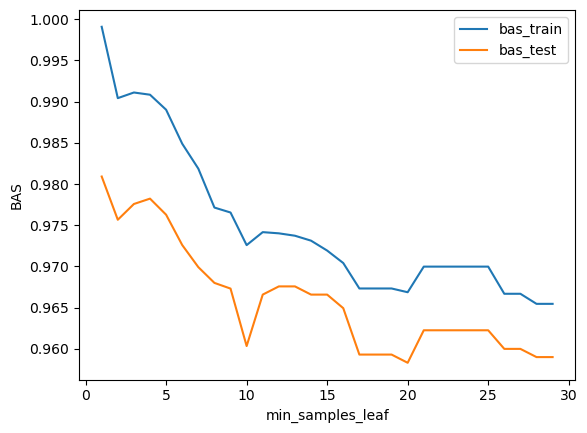

In [12]:
res = []
for param in range(1, 30, 1):
    model = DecisionTreeClassifier(min_samples_leaf=param, random_state=42)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, balanced_accuracy_score_my(target_train, pred_train), balanced_accuracy_score_my(target_test, pred_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'bas_train', 'bas_test'])

res_pd.set_index('min_samples_leaf')['bas_train'].plot(label='bas_train')
res_pd.set_index('min_samples_leaf')['bas_test'].plot(label='bas_test')
plt.legend()
plt.ylabel('BAS')

In [13]:
res_pd[res_pd['bas_test'] == res_pd['bas_test'].max()]

,min_samples_leaf,bas_train,bas_test
0,1,0.999088,0.980916


In [14]:
from sklearn.ensemble import RandomForestClassifier

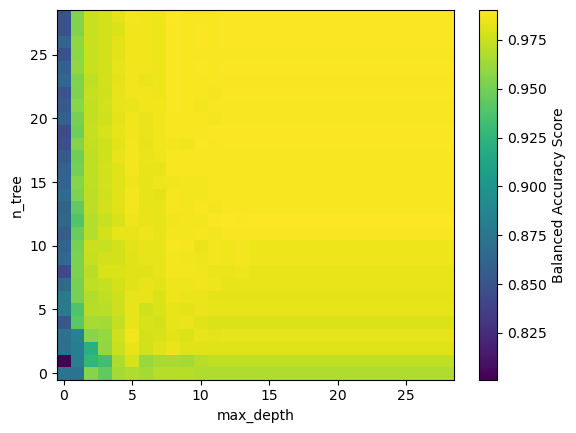

In [15]:
res = []
for n_tree in range(1, 30):
    for max_depth in range(1, 30):
        model = RandomForestClassifier(n_estimators=n_tree, max_depth=max_depth, min_samples_leaf=3, random_state=7)

        model.fit(features_train, target_train)
        pred_test = model.predict(features_test)

        res.append([n_tree, max_depth, balanced_accuracy_score_my(target_test, pred_test)])

res_pd = pd.DataFrame(res, columns=['n_tree', 'max_depth', 'bas_test'])

# Создадим тепловую карту
plt.imshow(res_pd.pivot(index='n_tree', columns='max_depth', values='bas_test'), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Balanced Accuracy Score')
plt.xlabel('max_depth')
plt.ylabel('n_tree')
plt.show()

In [16]:
res_pd[res_pd['bas_test'] == res_pd['bas_test'].max()]

,n_tree,max_depth,bas_test
820,29,9,0.990345


In [17]:
from xgboost import XGBClassifier

In [18]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.15, random_state=42)

In [19]:
res = []
for n_estimators in range(1, 20):
    for max_depth in range(1, 5):
        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=0.05, early_stopping_rounds=100)

        model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
        pred_train = model.predict(features_train)
        pred_test = model.predict(features_test)
        
        res.append([n_estimators, max_depth, balanced_accuracy_score_my(target_train, pred_train), balanced_accuracy_score_my(target_test, pred_test)])

metrics = pd.DataFrame(res, columns = ['n_estimators', 'max_depth', 'bas_train', 'bas_test'])

[0]	validation_0-logloss:0.52557	validation_1-logloss:0.51617
[0]	validation_0-logloss:0.51679	validation_1-logloss:0.50719
[0]	validation_0-logloss:0.51419	validation_1-logloss:0.50539
[0]	validation_0-logloss:0.51279	validation_1-logloss:0.50403
[0]	validation_0-logloss:0.52557	validation_1-logloss:0.51617
[1]	validation_0-logloss:0.49840	validation_1-logloss:0.48933
[0]	validation_0-logloss:0.51679	validation_1-logloss:0.50719
[1]	validation_0-logloss:0.48326	validation_1-logloss:0.47354
[0]	validation_0-logloss:0.51419	validation_1-logloss:0.50539
[1]	validation_0-logloss:0.47836	validation_1-logloss:0.46954
[0]	validation_0-logloss:0.51279	validation_1-logloss:0.50403
[1]	validation_0-logloss:0.47597	validation_1-logloss:0.46824
[0]	validation_0-logloss:0.52557	validation_1-logloss:0.51617
[1]	validation_0-logloss:0.49840	validation_1-logloss:0.48933
[2]	validation_0-logloss:0.47450	validation_1-logloss:0.46567
[0]	validation_0-logloss:0.51679	validation_1-logloss:0.50719
[1]	vali

In [20]:
# параметры для обучения
n_trees = 50
learning_rates = [0.1, 0.05, 0.01]  # значения для величины шага
max_depths = [3, 4, 5]  # значения для глубины деревьев

best_score = 0
best_params = None

for lr in learning_rates:
    for max_depth in max_depths:
        # Создаем модель с выбранными параметрами
        model = XGBClassifier(n_estimators=n_trees, learning_rate=lr, max_depth=max_depth)

        # Обучаем модель на обучающем наборе
        model.fit(features_train_xgb, target_train_xgb)

        # Получаем предсказания для обучающего и валидационного наборов
        pred_train = model.predict(features_train)
        pred_test = model.predict(features_test)

        # Вычисляем метрику качества на валидационном наборе
        score = balanced_accuracy_score_my(target_test, pred_test)

        print(f'Learning Rate: {lr}, Max Depth: {max_depth}, Balanced Accuracy Score: {score}')

        # Если текущая комбинация параметров лучше предыдущих, сохраним ее
        if score > best_score:
            best_score = score
            best_params = (lr, max_depth)

print(f'Лучшая комбинация параметров: Learning Rate = {best_params[0]}, Max Depth = {best_params[1]}')

Learning Rate: 0.1, Max Depth: 3, Balanced Accuracy Score: 0.9866665932953269
Learning Rate: 0.1, Max Depth: 4, Balanced Accuracy Score: 0.983678545486562
Learning Rate: 0.1, Max Depth: 5, Balanced Accuracy Score: 0.9820318174814554
Learning Rate: 0.05, Max Depth: 3, Balanced Accuracy Score: 0.9786585701393322
Learning Rate: 0.05, Max Depth: 4, Balanced Accuracy Score: 0.9767064339327771
Learning Rate: 0.05, Max Depth: 5, Balanced Accuracy Score: 0.9786984658052871
Learning Rate: 0.01, Max Depth: 3, Balanced Accuracy Score: 0.9295882767273448
Learning Rate: 0.01, Max Depth: 4, Balanced Accuracy Score: 0.9395484360898946
Learning Rate: 0.01, Max Depth: 5, Balanced Accuracy Score: 0.9551393872025709
Лучшая комбинация параметров: Learning Rate = 0.1, Max Depth = 3


In [25]:
# Создаем модель с лучшими параметрами
model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, early_stopping_rounds=20)

# Обучаем модель на обучающем наборе
model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])

# Получаем предсказания для обучающего и валидационного наборов
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

# Вычисляем метрику качества на валидационном наборе
score = balanced_accuracy_score_my(target_test, pred_test)
print(f'Learning Rate: {lr}, Max Depth: {max_depth}, Balanced Accuracy Score: {score}')

[0]	validation_0-logloss:0.47523	validation_1-logloss:0.46782
[1]	validation_0-logloss:0.41449	validation_1-logloss:0.40688
[2]	validation_0-logloss:0.36648	validation_1-logloss:0.35936
[3]	validation_0-logloss:0.32648	validation_1-logloss:0.32029
[4]	validation_0-logloss:0.29302	validation_1-logloss:0.28772
[5]	validation_0-logloss:0.26461	validation_1-logloss:0.26007
[6]	validation_0-logloss:0.24009	validation_1-logloss:0.23609
[7]	validation_0-logloss:0.21851	validation_1-logloss:0.21509
[8]	validation_0-logloss:0.19962	validation_1-logloss:0.19665
[9]	validation_0-logloss:0.18213	validation_1-logloss:0.18056
[10]	validation_0-logloss:0.16678	validation_1-logloss:0.16641
[11]	validation_0-logloss:0.15354	validation_1-logloss:0.15324


[12]	validation_0-logloss:0.14117	validation_1-logloss:0.14148
[13]	validation_0-logloss:0.12997	validation_1-logloss:0.13114
[14]	validation_0-logloss:0.12010	validation_1-logloss:0.12217
[15]	validation_0-logloss:0.11098	validation_1-logloss:0.11371
[16]	validation_0-logloss:0.10309	validation_1-logloss:0.10667
[17]	validation_0-logloss:0.09604	validation_1-logloss:0.10007
[18]	validation_0-logloss:0.08967	validation_1-logloss:0.09424
[19]	validation_0-logloss:0.08360	validation_1-logloss:0.08858
[20]	validation_0-logloss:0.07843	validation_1-logloss:0.08412
[21]	validation_0-logloss:0.07347	validation_1-logloss:0.07927
[22]	validation_0-logloss:0.06919	validation_1-logloss:0.07576
[23]	validation_0-logloss:0.06486	validation_1-logloss:0.07208
[24]	validation_0-logloss:0.06113	validation_1-logloss:0.06852
[25]	validation_0-logloss:0.05754	validation_1-logloss:0.06523
[26]	validation_0-logloss:0.05430	validation_1-logloss:0.06242
[27]	validation_0-logloss:0.05160	validation_1-logloss:

С увеличением количества деревьев, улучшается Balanced Accuracy Score. Предсказания получаются более точными. 

Лучшая комбинация параметров: Learning Rate = 0.1, Max Depth = 3. 
Этот выбор основан на Balanced Accuracy Score. 
Для этих параметров точность оказалась самой высокой.

Лучше всего себя показал метод ансамблей градиентный бустинг для 200 деревьев с Balanced Accuracy Score = 0.99134

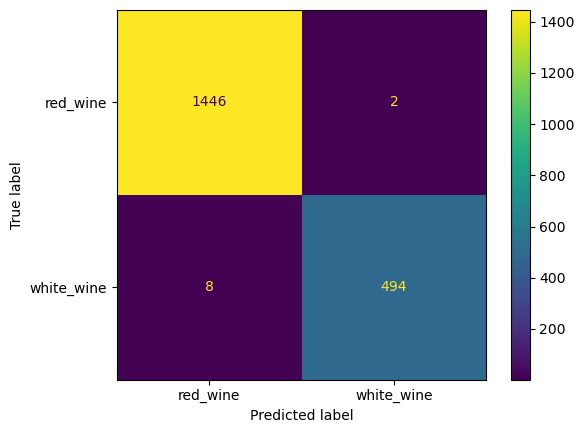

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(target_test, pred_test), display_labels=['red_wine', 'white_wine']).plot()